In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
dataset = "/content/drive/MyDrive/Project II (Sem VII)/Liver Patient Dataset (LPD)_train.csv"

In [4]:
df = pd.read_csv(dataset, encoding='ISO-8859-1')

In [5]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [7]:
df.drop('Gender of the patient', axis=1, inplace=True)

In [8]:
df = df.dropna(subset=['Age of the patient'])

In [9]:
df = df.copy()
df.rename(columns={
    'Age of the patient': 'Age',
    'Total Bilirubin': 'Bilirubin_Total',
    'Direct Bilirubin': 'Bilirubin_Direct',
    ' Alkphos Alkaline Phosphotase': 'Alkaline_Phosphatase',
    ' Sgpt Alamine Aminotransferase': 'SGPT',
    'Sgot Aspartate Aminotransferase': 'SGOT',
    'Total Protiens': 'Proteins_Total',
    ' ALB Albumin': 'Albumin',
    'A/G Ratio Albumin and Globulin Ratio': 'Albumin_Globulin_Ratio'
}, inplace=True)

In [10]:
df

,Age,Bilirubin_Total,Bilirubin_Direct,Alkaline_Phosphatase,SGPT,SGOT,Proteins_Total,Albumin,Albumin_Globulin_Ratio,Result
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...
30686,50.0,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [11]:
df.isna().sum()

,0
Age,0
Bilirubin_Total,648
Bilirubin_Direct,561
Alkaline_Phosphatase,796
SGPT,538
SGOT,462
Proteins_Total,463
Albumin,494
Albumin_Globulin_Ratio,559
Result,0


In [12]:
# df.loc[:, 'Bilirubin_Total'] = df['Bilirubin_Total'].fillna(df['Bilirubin_Total'].median())
# df.loc[:, 'Bilirubin_Direct'] = df['Bilirubin_Direct'].fillna(df['Bilirubin_Direct'].median())
# df.loc[:, 'Alkaline_Phosphatase'] = df['Alkaline_Phosphatase'].fillna(df['Alkaline_Phosphatase'].median())
# df.loc[:, 'SGPT'] = df['SGPT'].fillna(df['SGPT'].median())
# df.loc[:, 'SGOT'] = df['SGOT'].fillna(df['SGOT'].median())
# df.loc[:, 'Proteins_Total'] = df['Proteins_Total'].fillna(df['Proteins_Total'].median())
# df.loc[:, 'Albumin'] = df['Albumin'].fillna(df['Albumin'].median())
# df.loc[:, 'Albumin_Globulin_Ratio'] = df['Albumin_Globulin_Ratio'].fillna(df['Albumin_Globulin_Ratio'].median())

In [13]:
# # Check if there are any remaining missing values
# print(df.isnull().sum())

In [14]:
# Fill missing values using the median for the renamed columns
df['Bilirubin_Total'].fillna(df['Bilirubin_Total'].median(), inplace=True)
df['Bilirubin_Direct'].fillna(df['Bilirubin_Direct'].median(), inplace=True)
df['Alkaline_Phosphatase'].fillna(df['Alkaline_Phosphatase'].median(), inplace=True)
df['SGPT'].fillna(df['SGPT'].median(), inplace=True)
df['SGOT'].fillna(df['SGOT'].median(), inplace=True)
df['Proteins_Total'].fillna(df['Proteins_Total'].median(), inplace=True)
df['Albumin'].fillna(df['Albumin'].median(), inplace=True)
df['Albumin_Globulin_Ratio'].fillna(df['Albumin_Globulin_Ratio'].median(), inplace=True)

# Check if there are any remaining missing values
print(df.isnull().sum())


Age                       0
Bilirubin_Total           0
Bilirubin_Direct          0
Alkaline_Phosphatase      0
SGPT                      0
SGOT                      0
Proteins_Total            0
Albumin                   0
Albumin_Globulin_Ratio    0
Result                    0
dtype: int64


<ipython-input-14-159585f21040>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bilirubin_Total'].fillna(df['Bilirubin_Total'].median(), inplace=True)
<ipython-input-14-159585f21040>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [15]:
result_mapping = { 1 : 0, 2:1}

In [16]:
df['Result'] = df['Result'].map(result_mapping)

In [17]:
X = df.drop('Result', axis=1)  # All columns except the target
y = df['Result']  # Target column

In [18]:
y.isna().sum()

0

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier()  # Use RandomForestRegressor() for regression problems
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [23]:
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

<ipython-input-24-dfac71e97e16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping w

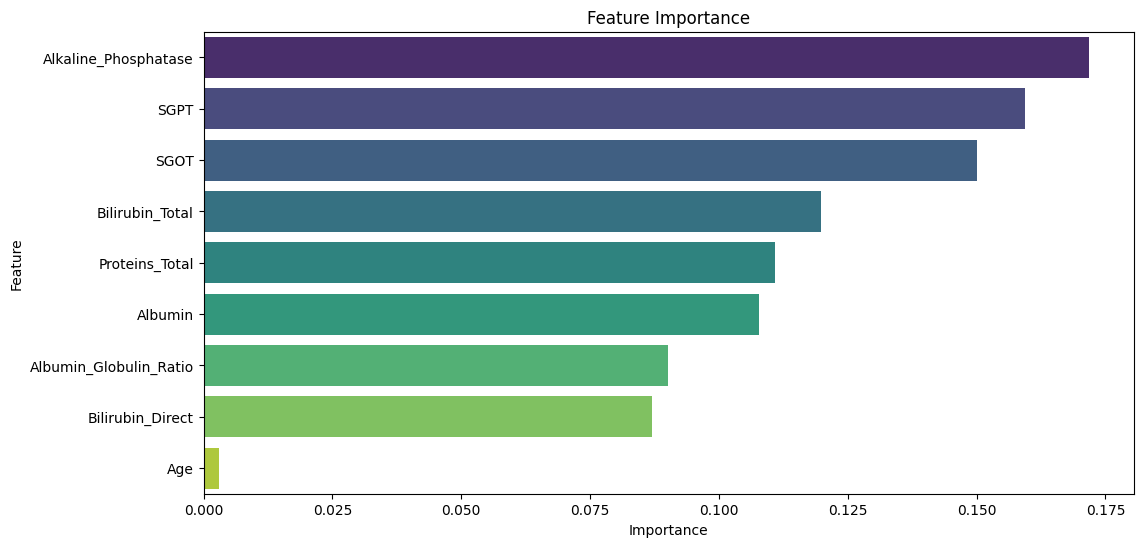

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4346,    2],
       [  12, 1778]])

In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4348
           1       1.00      0.99      1.00      1790

    accuracy                           1.00      6138
   macro avg       1.00      1.00      1.00      6138
weighted avg       1.00      1.00      1.00      6138



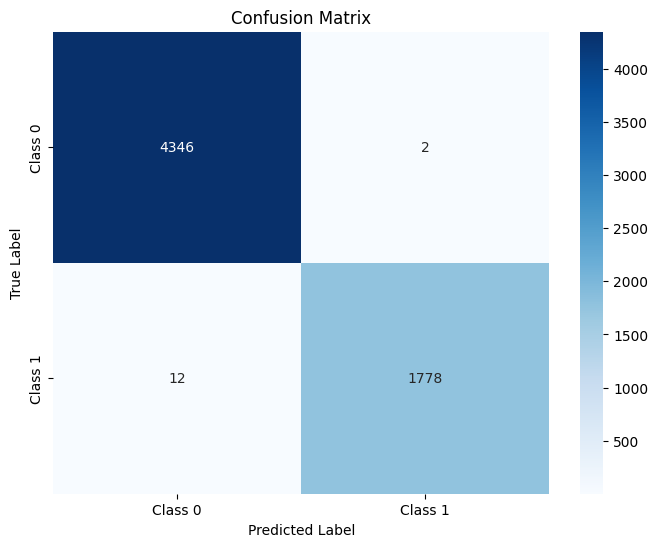

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()